# GRIP - The Sparks Foundation

# Data Science & Business Analytics

# Name - Sakshi Sonar

# Task 1 : Prediction using Supervised ML

In [1]:
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm
from warnings import filterwarnings
filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from skimage import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

# Reading the Dataset

In [3]:
# Reading data from remote link
url = "http://bit.ly/w-data"
data = pd.read_csv(url)
print("Data imported successfully")

data.head(10)

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


# Data Exploration

In [4]:
data.shape

(25, 2)

**Inference**: From above result, we can see that the dataset has 25 rows and 2 columns present in it.

In [5]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

**Inference**: From the above result, we can see that the  dataset has no null/missing values present in it.

In [6]:
data.duplicated().sum()

0

**Inference**:From the above result,we can see there are no duplicated values present in the dataset.

In [7]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


**Inference**:

    - The above tabular column contains the information such as count,mean,standard deviation,etc of each variables present 
      in the dataset.
      
    - Hence, From the above table,we can infer that, the count of each variable is 25 that is it has records on all its rows
      and indicated that there are no null/missing values present in the dataset.

# Check For Linearity

Text(0.5, 1.0, 'Hours Vs Percentage')

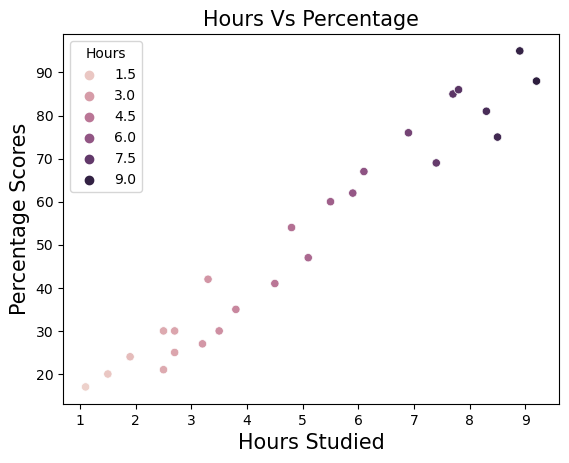

In [10]:
sns.scatterplot(data['Hours'],data['Scores'],hue=data['Hours'])
plt.xlabel('Hours Studied',fontsize=15)
plt.ylabel('Percentage Scores',fontsize=15)
plt.title('Hours Vs Percentage',fontsize=15)

**Inference** : From above plot we can refer that,the data has a positive relation between the number of hours and percentage of score.

# Heatmap for Correlation

<AxesSubplot:>

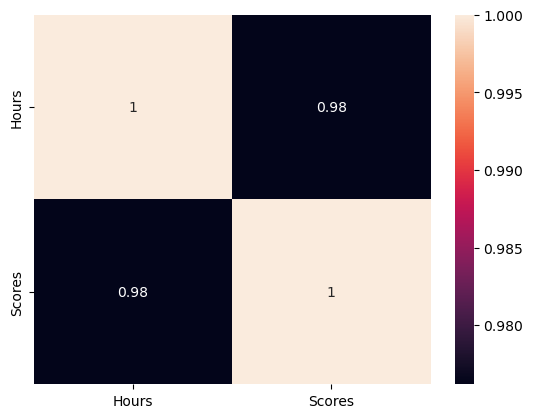

In [12]:
sns.heatmap(data.corr(),annot=True)

**Inference** : From above heatmap,we can see that correlation=0.98.This means that our dependent variable scores increases as the independent variable Hours increases.

# Preparing the data using Train Test Split

In [14]:
x=data.iloc[:,:-1].values
y=data.iloc[:,1].values

In [15]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=0)

In [17]:
print("Shape of Xtrain:",xtrain.shape)
print("Shape of Xtest:",xtest.shape)
print("Shape of ytrain:",ytrain.shape)
print("Shape of ytest:",ytest.shape)

Shape of Xtrain: (20, 1)
Shape of Xtest: (5, 1)
Shape of ytrain: (20,)
Shape of ytest: (5,)


# Training the Algorithm

In [19]:
regressor=LinearRegression()
regressor.fit(xtrain,ytrain)
print("Training Complete")

Training Complete


**From the above result, we can see that, the training of the algorithm is successful.**

In [20]:
#checking the coefficients for the prediction of each of the predictor
print('\n'+"Coefficient of the predictor :",regressor.coef_)


Coefficient of the predictor : [9.91065648]


In [21]:
#checking the intercept
print("Intercept :",regressor.intercept_)

Intercept : 2.018160041434683


# Prediction of Training and Test data

In [22]:
y_pred=regressor.predict(xtest)
x_pred=regressor.predict(xtrain)

In [23]:
y_pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [24]:
x_pred

array([39.67865467, 20.84840735, 79.32128059, 70.40168976, 12.91988217,
       52.56250809, 78.33021494, 34.72332643, 84.27660883, 93.19619966,
       62.47316457, 36.70545772, 28.77693254, 56.52677068, 28.77693254,
       86.25874013, 26.79480124, 49.58931115, 90.22300272, 46.6161142 ])

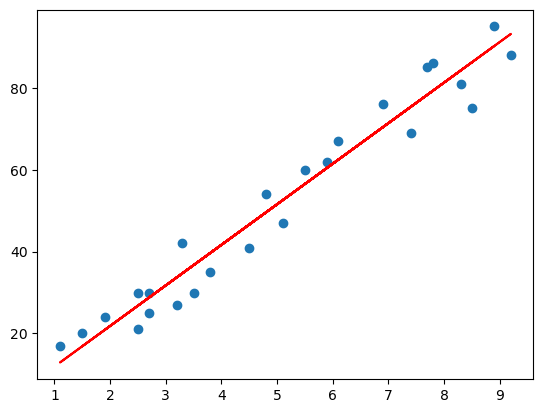

In [27]:
#Plotting the regression line
line=regressor.coef_*x+regressor.intercept_

#plotting for the test data
plt.scatter(x,y)
plt.plot(x,line,color='red');
plt.show()

# Visualizing for train data result

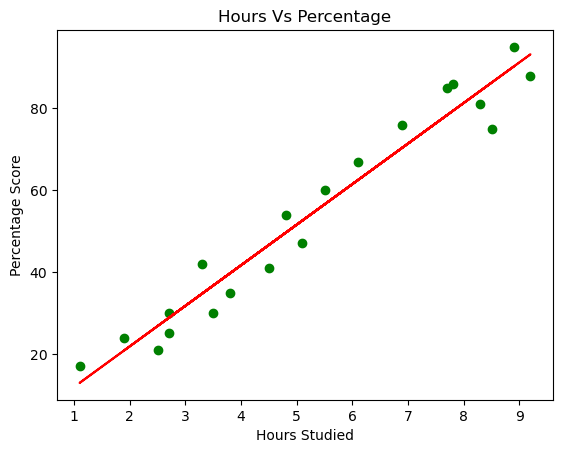

In [29]:
plt.scatter(xtrain,ytrain,color='green')
plt.plot(xtrain,x_pred,color='red')
plt.title("Hours Vs Percentage")
plt.xlabel("Hours Studied")
plt.ylabel("Percentage Score")
plt.show()

# Visualizing for test data result

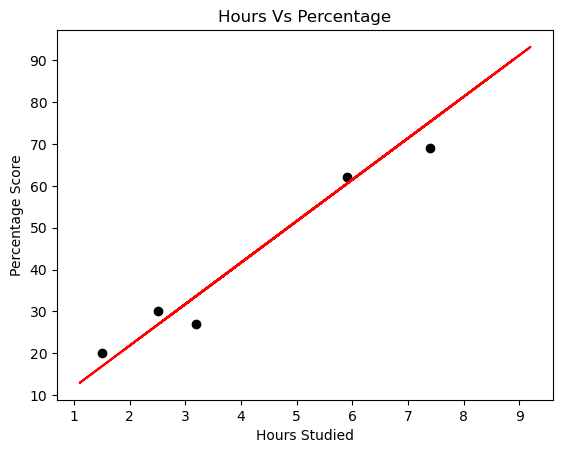

In [30]:
plt.scatter(xtest,ytest,color='black')
plt.plot(xtrain,x_pred,color='red')
plt.title("Hours Vs Percentage")
plt.xlabel("Hours Studied")
plt.ylabel("Percentage Score")
plt.show()

# Making Predictions

In [31]:
print(xtest) #testing data in hours
y_pred=regressor.predict(xtest) #Predicting the scores
y_pred

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [32]:
#Comparing Actual Vs Predicted
df=pd.DataFrame({'Actual':ytest,'Predicted':y_pred})
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [33]:
#Test with own data
hours=np.array([[9.25]])
own_pred=regressor.predict(hours)
print("No of Hours={}".format(hours))
print("Predicted Score={}".format(own_pred[0]))

No of Hours=[[9.25]]
Predicted Score=93.69173248737538


**Inference : From the above result,we can refer that, the predicted score of a student who studies for 9.25 hours/day is 93.69**

# Evaluation of the Model

In [38]:
#Checking for MAE value
mae=mean_absolute_error(ytest,y_pred)
mse=mean_squared_error(ytest,y_pred)
rmse=np.sqrt(mse)
print("\nMean Absolute Error:",round(mae,2))
print("Mean Squared Error:",round(mse,2))
print("Root Mean Squared Error:",round(rmse,2))


Mean Absolute Error: 4.18
Mean Squared Error: 21.6
Root Mean Squared Error: 4.65


**Inference** : From above result, we can infer that, all the error values are almost low.

# END